# Импорты

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from statannotations.Annotator import Annotator
from itertools import combinations

In [6]:
community_dataset = pd.read_csv('community_dataset.csv')

In [7]:
community_dataset.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


# Задание 1

#### Есть ли стат-значимость между типом клетки и:
#### б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.
#### в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.
#### В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика. 

In [8]:
community_dataset[['cell_type', 'area_of_cell']]

,cell_type,area_of_cell
0,Stroma cells,185
1,Stroma cells,209
2,Stroma cells,254
3,Unclassified,156
4,Unclassified,194
...,...,...
269437,Stroma cells,258
269438,Immune type 1,160
269439,Unclassified,190
269440,Stroma cells,535


In [9]:
order = community_dataset['age_group'].unique()
order

array(['elder_group', 'young_group'], dtype=object)

In [10]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=5.942e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.789e-03 U_stat=4.619e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:5.130e-04 U_stat=3.348e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
 

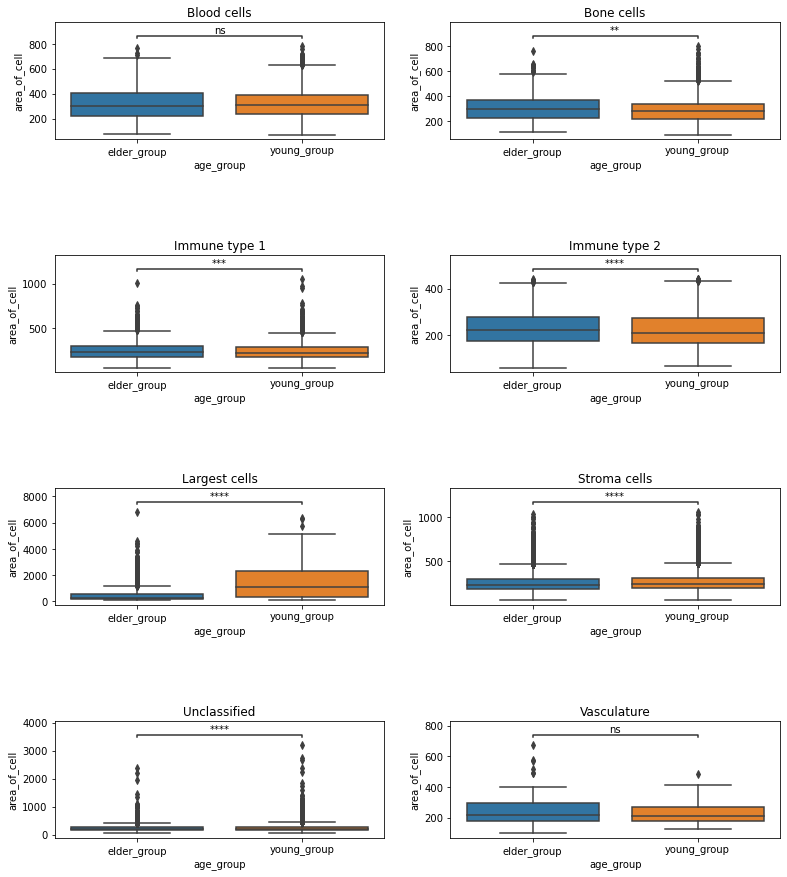

In [13]:
grouped = community_dataset.groupby(by='cell_type')[['area_of_cell', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['area_of_cell'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="area_of_cell", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()

#### во всех клетках кроме blood_cell и vascularize, площадь клетки (area_of_cell) у молодых и возврастных пациентов значимо отличается

# Задание 2 

#### В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction).

In [14]:
df_interaction = community_dataset[['cell_interaction', 
                   'case_id', 
                   'cell_type', 'area_of_cell']].groupby(by=['cell_interaction', 
                                         'case_id', 
                                         'cell_type']).count().reset_index().rename({'area_of_cell' : 'count'}, axis=1)
                   
df_interaction

,cell_interaction,case_id,cell_type,count
0,community_1,40,Blood cells,37
1,community_1,40,Bone cells,27
2,community_1,40,Immune type 1,27
3,community_1,40,Immune type 2,1343
4,community_1,40,Largest cells,67
...,...,...,...,...
366,community_6,983,Immune type 1,127
367,community_6,983,Immune type 2,211
368,community_6,983,Largest cells,100
369,community_6,983,Stroma cells,2278


In [15]:
cell_types = df_interaction['cell_type'].unique()
cell_types

array(['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
       'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'],
      dtype=object)

In [16]:
blood_cells = df_interaction[df_interaction['cell_type'] == 'Blood cells']
blood_cells

,cell_interaction,case_id,cell_type,count
0,community_1,40,Blood cells,37
8,community_1,199,Blood cells,155
15,community_1,559,Blood cells,42
23,community_1,566,Blood cells,9
31,community_1,693,Blood cells,351
39,community_1,708,Blood cells,53
47,community_1,891,Blood cells,20
55,community_1,983,Blood cells,143
62,community_2,40,Blood cells,40
70,community_2,199,Blood cells,96


Text(0.5, 1.0, 'Blood cells')

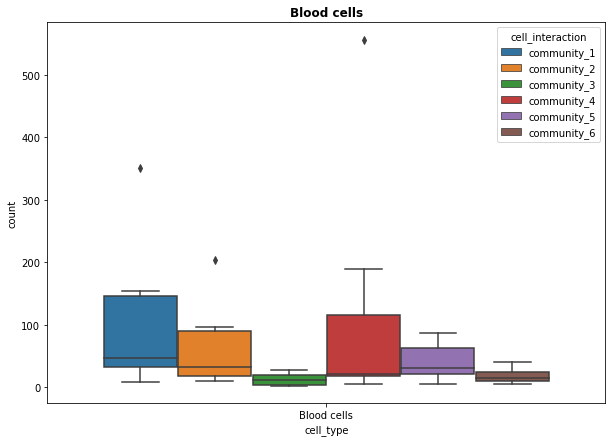

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=blood_cells['cell_type'], y=blood_cells['count'], hue = blood_cells['cell_interaction']) 
ax.set_title('Blood cells', fontweight='bold')

In [18]:
stats.kruskal(blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_3']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=13.595872269911977, pvalue=0.018390883472722126)

## H0 - медианы всех групп одинаковые. p-val < 0.05, гипотезу отвергаем

In [19]:
posthoc_dunn_test = sp.posthoc_dunn([blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_3']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_6']['count']])

In [20]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,True,False,True,True,False
2,True,True,False,True,True,True
3,False,False,True,False,False,True
4,True,True,False,True,True,True
5,True,True,False,True,True,True
6,False,True,True,True,True,True


In [21]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=38.0, pvalue=0.2816183135715713)

In [22]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=39.0, pvalue=0.25268065268065265)

In [23]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=42.0, pvalue=0.1590344834252767)

### community_1 обладает более выским показателем blood_cells, чем во всех других окружениях

# Задание 4 

In [24]:
count_of_cells = community_dataset[['case_id', 'area_of_cell']].groupby(by=['case_id']).count().reset_index().rename({'area_of_cell':'total'},axis=1)
count_of_cells

,case_id,total
0,40,50062
1,199,43790
2,559,7923
3,566,13732
4,693,70229
5,708,23765
6,891,8825
7,983,51116


In [25]:
community_dataset.join(count_of_cells.set_index('case_id'), on='case_id')

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,total
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,8825
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,8825
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,8825
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,8825
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,8825
...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,51116
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,51116
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,51116
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,51116


In [26]:
cells_by_interaction = community_dataset[['case_id', 
                                          'area_of_cell', 
                                          'cell_interaction']].groupby(by=['case_id', 
                                                                           'cell_interaction']).count().reset_index().rename({'area_of_cell':'total_by_interaction'},axis=1)
cells_by_interaction

,case_id,cell_interaction,total_by_interaction
0,40,community_1,7421
1,40,community_2,7734
2,40,community_3,8252
3,40,community_4,3669
4,40,community_5,13664
5,40,community_6,9322
6,199,community_1,8318
7,199,community_2,10530
8,199,community_3,5593
9,199,community_4,7626


In [27]:
community_dataset.join(count_of_cells.set_index('case_id'), on='case_id')

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,total
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,8825
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,8825
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,8825
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,8825
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,8825
...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,51116
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,51116
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,51116
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,51116


# Спасибо за проерку! 